In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [5]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\NLP\Data\ML471_S4_Datafile_Concept.csv")

In [6]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

In [7]:
series = df['Consumption']

In [8]:
train_size = int(len(series) * 0.8)
train = series[:train_size]
test = series[train_size:]

In [9]:
seasonal_period = 12
seasonal_naive_forecast = train.shift(seasonal_period)
seasonal_naive_forecast = seasonal_naive_forecast[-len(test):]
seasonal_naive_forecast.index = test.index

In [10]:
mae = mean_absolute_error(test, seasonal_naive_forecast)
print("Seasonal Naive MAE:", mae)

Seasonal Naive MAE: 13.394953749999999


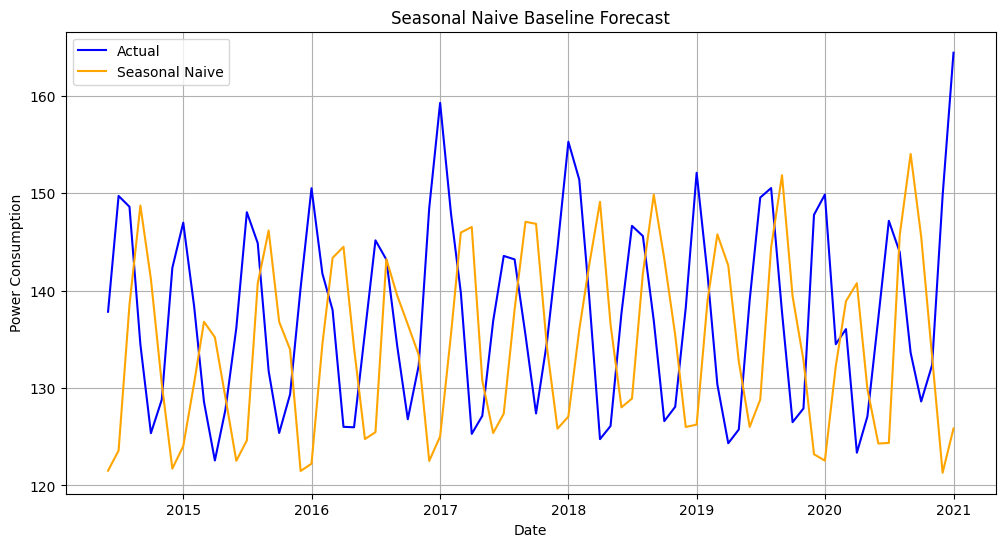

In [11]:
plt.figure(figsize=(12,6))
plt.plot(test, label="Actual", color='blue')
plt.plot(seasonal_naive_forecast, label="Seasonal Naive", color='orange')

plt.title("Seasonal Naive Baseline Forecast")
plt.xlabel("Date")
plt.ylabel("Power Consumption")
plt.legend()
plt.grid(True)
plt.show()